In [1]:
from acemodel import AceModel, Children, simulate_stack
from modelmtds import default_mtd, corr_rand_mtd, bootstrap_mtd
from spew import * 

In [2]:
import brfss
from brfss import bfs_data

In [3]:
brfss.race_list.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [4]:
brfss.income_list.keys()

dict_keys([0, 1, 2, 3, 4, 5, 9])

sample numbers in SCBRFSS (group by race and income)

In [5]:
scbrfss = bfs_data('./brfss/SCBRFSS.csv')

In [6]:
data_prex = './spew_data/2010_ver1_45079_synth_'
cdl_data = cdn_data(data_prex)
len(cdl_data)

261744

In [7]:
spew_brfss = bfs_data(cdl_data)
for r in list(brfss.race_list.keys())[1:]:
    for i in list(brfss.income_list.keys())[1:]:
        print('race: {} \t income: {}'.format(brfss.race_list[r], brfss.income_list[i]))
        print('\t sample size in brfss: {}'.format(len(scbrfss.get_value(r,i))))
        print('\t sample size in spew:  {}'.format(len(spew_brfss.get_value(r,i))))

race: White 	 income: < 15000
	 sample size in brfss: 2035
	 sample size in spew:  10814
race: White 	 income: 15000 - 24999
	 sample size in brfss: 3861
	 sample size in spew:  9175
race: White 	 income: 25000 - 34999
	 sample size in brfss: 2670
	 sample size in spew:  9736
race: White 	 income: 35000 - 49999
	 sample size in brfss: 3928
	 sample size in spew:  15712
race: White 	 income: 50000 +
	 sample size in brfss: 12229
	 sample size in spew:  88683
race: White 	 income: Don't Know
	 sample size in brfss: 5115
	 sample size in spew:  0
race: Black 	 income: < 15000
	 sample size in brfss: 2197
	 sample size in spew:  16813
race: Black 	 income: 15000 - 24999
	 sample size in brfss: 2682
	 sample size in spew:  15106
race: Black 	 income: 25000 - 34999
	 sample size in brfss: 1282
	 sample size in spew:  14602
race: Black 	 income: 35000 - 49999
	 sample size in brfss: 1268
	 sample size in spew:  18389
race: Black 	 income: 50000 +
	 sample size in brfss: 1978
	 sample size in 

In [8]:
ri_11_array = scbrfss.get_value(1,1,list(brfss.ace_list.values()))[list(brfss.ace_list.values())].to_numpy()

In [9]:
from sklearn.utils import resample
tmp = resample(ri_11_array, n_samples = 10)
(tmp != np.NaN).all(axis = 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
tmp = np.array([True, False, True])
sum(tmp)

2

In [11]:
ri_11_array.shape

(2035, 12)

In [12]:
tmp = pd.read_csv('./brfss/SCBRFSS.csv', low_memory = False)

In [13]:
tmp[(tmp[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)][list(brfss.ace_list.values())].notna().all(axis = 1).sum()

418

In [14]:
stack_model = AceModel(cdl_data[
    (cdl_data[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)
], 1, 1, step_method = default_mtd)

In [15]:
for i in range(100):
    stack_model.step()
    
res = stack_model.datacollector.model_vars['Output'][-1]; res

,id,age,_RACE_G1,_INCOMG,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
0,165121903,85,1,1,0,0,0,1,0,0,1,1,0,0,0,1
1,165121904,85,1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,165121905,85,1,1,0,0,0,0,0,0,0,1,0,0,0,0
3,165641324,50,1,1,0,0,0,1,0,0,0,0,0,0,0,1
4,165641323,29,1,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,162963346,72,1,1,1,1,0,0,0,0,0,1,0,0,0,0
10810,162963347,72,1,1,0,0,0,0,1,1,0,1,0,0,0,0
10811,162963348,72,1,1,0,0,0,0,0,0,1,1,1,0,0,1
10812,162963349,72,1,1,0,1,0,1,0,0,0,0,1,0,0,1


In [16]:
bfs_data(res).get_prop_mat(1,1)['pr']

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,0.210653,0.071481,0.022101,0.023026,0.061124,0.055946,0.047531,0.070464,0.037267,0.028944,0.020252,0.043832
alcoabuse,0.071481,0.329943,0.038654,0.033475,0.099223,0.085352,0.073701,0.116053,0.061772,0.046421,0.035510,0.069170
drugabuse,0.022101,0.038654,0.109025,0.012669,0.032458,0.027372,0.024875,0.038469,0.018032,0.015073,0.012484,0.021639
prison,0.023026,0.033475,0.012669,0.106529,0.032365,0.027279,0.021176,0.038561,0.022933,0.012761,0.013131,0.023118
patdivorce,0.061124,0.099223,0.032458,0.032365,0.294526,0.079342,0.061124,0.101905,0.055854,0.041890,0.030239,0.062142
phyabuse1,0.055946,0.085352,0.027372,0.027279,0.079342,0.262807,0.055299,0.094230,0.046236,0.036712,0.027002,0.059460
phyabuse2,0.047531,0.073701,0.024875,0.021176,0.061124,0.055299,0.215831,0.074625,0.040226,0.028297,0.023765,0.045589
verbalabuse,0.070464,0.116053,0.038469,0.038561,0.101905,0.094230,0.074625,0.346403,0.066858,0.044479,0.038931,0.071944
sexabuse1,0.037267,0.061772,0.018032,0.022933,0.055854,0.046236,0.040226,0.066858,0.185963,0.025430,0.021176,0.038839
sexabuse2,0.028944,0.046421,0.015073,0.012761,0.041890,0.036712,0.028297,0.044479,0.025430,0.134733,0.013316,0.027557


In [17]:
bfs_data(res).get_corr_mat(1,1)

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,1.000000,0.010317,-0.006810,0.004651,-0.004940,0.003259,0.012312,-0.012918,-0.012020,0.004037,-0.014865,-0.001744
alcoabuse,0.010317,1.000000,0.018298,-0.011534,0.009549,-0.006567,0.012866,0.007868,0.002267,0.012254,0.006106,0.000329
drugabuse,-0.006810,0.018298,1.000000,0.010966,0.002444,-0.009336,0.010483,0.004733,-0.018492,0.003606,0.010896,-0.009437
prison,0.004651,-0.011534,0.010966,1.000000,0.007040,-0.005280,-0.014308,0.011303,0.026017,-0.015110,0.020625,0.006418
patdivorce,-0.004940,0.009549,0.002444,0.007040,1.000000,0.009660,-0.013030,-0.000551,0.006105,0.014186,-0.004823,0.002443
phyabuse1,0.003259,-0.006567,-0.009336,-0.005280,0.009660,1.000000,-0.007861,0.015243,-0.015392,0.008669,-0.004309,0.024649
phyabuse2,0.012312,0.012866,0.010483,-0.014308,-0.013030,-0.007861,1.000000,-0.000711,0.000556,-0.005574,0.008824,0.002288
verbalabuse,-0.012918,0.007868,0.004733,0.011303,-0.000551,0.015243,-0.000711,1.000000,0.013179,-0.013495,0.017648,-0.003153
sexabuse1,-0.012020,0.002267,-0.018492,0.026017,0.006105,-0.015392,0.000556,0.013179,1.000000,0.002821,0.013906,-0.000704
sexabuse2,0.004037,0.012254,0.003606,-0.015110,0.014186,0.008669,-0.005574,-0.013495,0.002821,1.000000,-0.007884,-0.004772


In [18]:
corr_model = AceModel(cdl_data[
    (cdl_data[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)
], 1, 1, step_method = corr_rand_mtd)

In [19]:
for i in range(100):
    corr_model.step()
    
res = corr_model.datacollector.model_vars['Output'][-1]; res

,id,age,_RACE_G1,_INCOMG,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
0,165121903,85,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,165121904,85,1,1,0,0,0,0,1,0,0,1,0,0,0,1
2,165121905,85,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,165641324,50,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,165641323,29,1,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,162963346,72,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10810,162963347,72,1,1,0,0,0,0,0,1,0,0,0,0,0,1
10811,162963348,72,1,1,1,1,0,1,1,0,1,0,0,0,0,0
10812,162963349,72,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
bfs_data(res).get_prop_mat(1,1)['pr']

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,0.209358,0.069817,0.022933,0.014888,0.054097,0.042537,0.034585,0.048548,0.022656,0.005826,0.002034,0.016830
alcoabuse,0.069817,0.314870,0.030701,0.025892,0.076567,0.063899,0.047901,0.073701,0.029776,0.008323,0.002589,0.025707
drugabuse,0.022933,0.030701,0.081191,0.006196,0.021546,0.016460,0.012114,0.018864,0.008230,0.002034,0.000647,0.006473
prison,0.014888,0.025892,0.006196,0.061124,0.016368,0.012669,0.009155,0.014518,0.007768,0.001849,0.000647,0.005086
patdivorce,0.054097,0.076567,0.021546,0.016368,0.243851,0.054559,0.039763,0.056686,0.021454,0.005548,0.002404,0.023673
phyabuse1,0.042537,0.063899,0.016460,0.012669,0.054559,0.180229,0.030978,0.044572,0.018864,0.005271,0.001757,0.017292
phyabuse2,0.034585,0.047901,0.012114,0.009155,0.039763,0.030978,0.140004,0.037082,0.016460,0.004531,0.002034,0.014611
verbalabuse,0.048548,0.073701,0.018864,0.014518,0.056686,0.044572,0.037082,0.207046,0.025522,0.005826,0.002034,0.018402
sexabuse1,0.022656,0.029776,0.008230,0.007768,0.021454,0.018864,0.016460,0.025522,0.082856,0.005456,0.001665,0.008970
sexabuse2,0.005826,0.008323,0.002034,0.001849,0.005548,0.005271,0.004531,0.005826,0.005456,0.017015,0.001387,0.002034


In [21]:
bfs_data(res).get_corr_mat(1,1)

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,1.000000,0.020619,0.053412,0.021456,0.017426,0.030725,0.037357,0.031551,0.047340,0.043020,0.030675,0.018771
alcoabuse,0.020619,1.000000,0.040489,0.059732,-0.001072,0.040049,0.023690,0.045209,0.028801,0.049362,0.026544,0.028044
drugabuse,0.053412,0.040489,1.000000,0.018843,0.014901,0.017404,0.007881,0.018561,0.019962,0.018485,0.010619,0.010077
prison,0.021456,0.059732,0.018843,1.000000,0.014217,0.017944,0.007184,0.019189,0.040934,0.026126,0.018259,0.012107
patdivorce,0.017426,-0.001072,0.014901,0.014217,1.000000,0.064281,0.037740,0.035619,0.010554,0.025197,0.034959,0.057618
phyabuse1,0.030725,0.040049,0.017404,0.017944,0.064281,1.000000,0.043078,0.046589,0.037103,0.044344,0.028151,0.045505
phyabuse2,0.037357,0.023690,0.007881,0.007184,0.037740,0.043078,1.000000,0.057571,0.050809,0.047888,0.050644,0.052372
verbalabuse,0.031551,0.045209,0.018561,0.019189,0.035619,0.046589,0.057571,1.000000,0.074913,0.043947,0.031219,0.035530
sexabuse1,0.047340,0.028801,0.019962,0.040934,0.010554,0.037103,0.050809,0.074913,1.000000,0.113493,0.060600,0.043577
sexabuse2,0.043020,0.049362,0.018485,0.026126,0.025197,0.044344,0.047888,0.043947,0.113493,1.000000,0.137185,0.024866


In [22]:
# default_result = simulate_stack(mtd = default_mtd, display = False)

In [23]:
# corr_result = simulate_stack(mtd = corr_rand_mtd, display = False)

In [24]:
bst_result = simulate_stack(mtd = bootstrap_mtd, cdl_data = cdl_data, step_num = 1)

number of samples which don't have NaN values

In [25]:
for r in list(brfss.race_list.keys())[1:]:
    for i in list(brfss.income_list.keys())[1:]:
        print('race: {} \t income: {}'.format(brfss.race_list[r], brfss.income_list[i]))
        print('\t sample size in brfss: {}'.format(len(scbrfss.get_value(r,i))))
        ri_values = scbrfss.get_value(r, i, list(brfss.ace_list.values())).to_numpy()[:, 2:]
        v_count = np.isnan(ri_values).sum(axis = 1)
        hist_c,bins_c = np.histogram(v_count, bins = np.arange(14), density = False)
        hist,bins = np.histogram(v_count, bins = np.arange(14), density = True)
        for c in range(13):
            print('\t{:>2}: \t {:>6d} \t {:.6f} \t {:.6f}'.format(c, hist_c[c], hist[c], np.cumsum(hist)[c]))
        print('')

race: White 	 income: < 15000
	 sample size in brfss: 2035
	 0: 	    372 	 0.182801 	 0.182801
	 1: 	    918 	 0.451106 	 0.633907
	 2: 	     77 	 0.037838 	 0.671744
	 3: 	     18 	 0.008845 	 0.680590
	 4: 	     10 	 0.004914 	 0.685504
	 5: 	      3 	 0.001474 	 0.686978
	 6: 	      2 	 0.000983 	 0.687961
	 7: 	      0 	 0.000000 	 0.687961
	 8: 	      2 	 0.000983 	 0.688943
	 9: 	      2 	 0.000983 	 0.689926
	10: 	      0 	 0.000000 	 0.689926
	11: 	    367 	 0.180344 	 0.870270
	12: 	    264 	 0.129730 	 1.000000

race: White 	 income: 15000 - 24999
	 sample size in brfss: 3861
	 0: 	    753 	 0.195027 	 0.195027
	 1: 	   1737 	 0.449883 	 0.644911
	 2: 	     78 	 0.020202 	 0.665113
	 3: 	     29 	 0.007511 	 0.672624
	 4: 	     17 	 0.004403 	 0.677027
	 5: 	      3 	 0.000777 	 0.677804
	 6: 	      5 	 0.001295 	 0.679099
	 7: 	      1 	 0.000259 	 0.679358
	 8: 	      1 	 0.000259 	 0.679617
	 9: 	      1 	 0.000259 	 0.679876
	10: 	      0 	 0.000000 	 0.679876
	11: 	    8

In [26]:
ri_values = scbrfss.get_value(1,1, list(brfss.ace_list.values())).to_numpy()[:, 2:]

In [27]:
ri_values[(np.isnan(ri_values)).all(axis = 1)].shape

(264, 12)

In [28]:
v_count = np.isnan(ri_values).sum(axis = 1)

In [29]:
np.unique(v_count)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 12])

In [30]:
hist,bins = np.histogram(v_count, bins = np.arange(14), density = True)

In [31]:
hist, bins

(array([0.18280098, 0.45110565, 0.03783784, 0.00884521, 0.004914  ,
        0.0014742 , 0.0009828 , 0.        , 0.0009828 , 0.0009828 ,
        0.        , 0.18034398, 0.12972973]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [32]:
np.cumsum(hist)

array([0.18280098, 0.63390663, 0.67174447, 0.68058968, 0.68550369,
       0.68697789, 0.68796069, 0.68796069, 0.68894349, 0.68992629,
       0.68992629, 0.87027027, 1.        ])

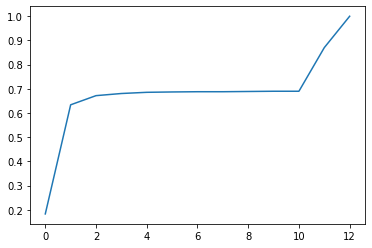

In [33]:
from matplotlib import pyplot as plt
plt.plot(np.arange(13), np.cumsum(hist))